# Tina Liu 

## Research question/interests

Briefly describe your research question or interests here.

In this research, something I am intersted in is whether or not gender plays a role in how well students perform. If so, I want to see if there is a correlation from other social aspects that might impact a students performance. I specifically want to look at the two different sex (male/female) in correlation to math, reading, and writing scores. Additionally, as a female, I have personally grown up with the stereotype that 'boys are smarter than girls' so through these data sets I want to be able to debunk that stereotype.  

In [ ]:
import numpy as np
import pandas as pd
pd.read_csv('../data/raw/exams.csv')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


Task1 - Milestone 3 

Looks at the specific columns that I will be exploring in Milestone 3 (gender and test scores) + the total score. 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
d = pd.read_csv('../data/raw/exams.csv')
d = d.drop(columns = ["race/ethnicity","parental level of education", "lunch", "test preparation course"])
d['total score']=d['reading score']+d['math score']+d['writing score']
d

,gender,math score,reading score,writing score,total score
0,male,67,67,63,197
1,female,40,59,55,154
2,male,59,60,50,169
3,male,77,78,68,223
4,male,78,73,68,219
...,...,...,...,...,...
995,male,73,70,65,208
996,male,85,91,92,268
997,female,32,35,41,108
998,female,73,74,82,229


In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 

dp = pd.read_csv('../data/raw/exams.csv')
dp.shape
dp.head()
dp.columns 
dp.nunique(axis=0)
dp = dp[dp['math score'].between(0.0,100.0)]
dp = dp[dp['reading score'].between(0.0,100.0)]
dp = dp[dp['writing score'].between(0.0,100.0)]
dp = dp.dropna(axis=0)
dp = dp.dropna(axis=1)
dp.shape
dp.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


<AxesSubplot:ylabel='Frequency'>

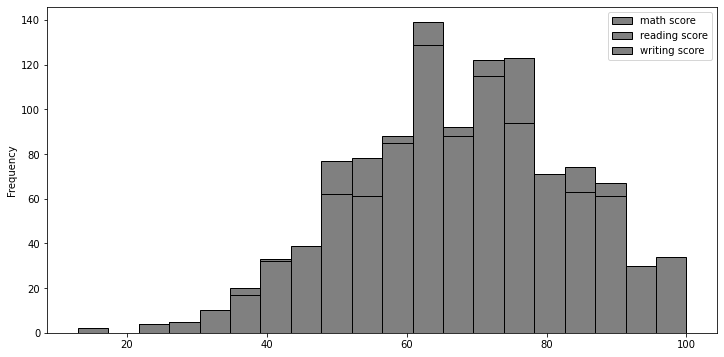

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 

dp.plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

Task 2 - Milestone 3 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

columns = ['gender','math score','reading score','writing score']
graph = pd.read_csv('../data/raw/exams.csv', usecols=columns) 
graph[['math score', 'reading score','writing score']].mean(axis=0, skipna=True)

math score       66.396
reading score    69.002
writing score    67.738
dtype: float64

For this specific graph, I compared the two different sex (male/female) with their specific readings scores and seeing which gender has a higher standard deviation. 

<AxesSubplot:xlabel='gender', ylabel='reading score'>

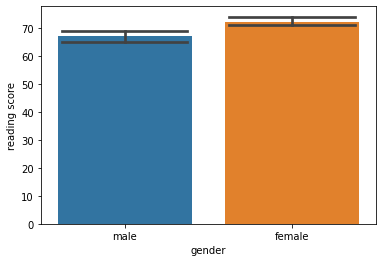

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns 
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='reading score', data=d, estimator=np.median, capsize =0.75)

For this specific graph, I compared the two different sex(male/female) with their specific math scores and seeing which gender has a higher standard deviation.  

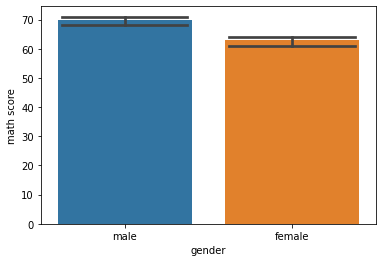

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
d = pd.read_csv('../data/raw/exams.csv')
j = sns.barplot(x='gender',y='math score', data=d,estimator=np.median, capsize = 0.75)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

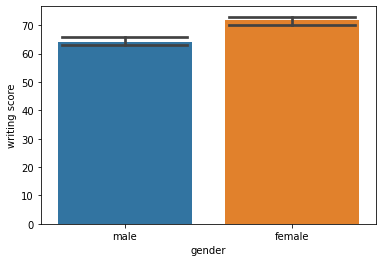

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
d = pd.read_csv('../data/raw/exams.csv')
sns.barplot(x='gender',y='writing score', data=d, estimator=np.median, capsize =0.75)

Task 3 - Milestone 3 

In [103]:
import pandas as pd
import numpy as np

total=d['reading score']+d['math score']+d['writing score']
df = (
    pd.read_csv('../data/raw/exams.csv')
    .drop(columns = ["race/ethnicity","parental level of education", "test preparation course","lunch"])
    .dropna()
    .rename(columns={'gender': 'Gender', 'math score': 'Math Score', 'reading score': 'Reading Score', 'writing score': 'Writing Score'},)
    .assign(total = total)
)
print(df)
    

     Gender  Math Score  Reading Score  Writing Score  total
0      male          67             67             63    197
1    female          40             59             55    154
2      male          59             60             50    169
3      male          77             78             68    223
4      male          78             73             68    219
..      ...         ...            ...            ...    ...
995    male          73             70             65    208
996    male          85             91             92    268
997  female          32             35             41    108
998  female          73             74             82    229
999    male          65             60             62    187

[1000 rows x 5 columns]
